In [2]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint
from scipy import stats
import itertools

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

from mlxtend.data import boston_housing_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

# import the ML algorithm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from mlxtend.regressor import StackingRegressor
from mlxtend.regressor import StackingCVRegressor

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score

In [67]:
# Loading dataset and view a few records.
df = pd.read_csv('E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\glass.csv')

In [68]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [69]:
df.shape

(214, 11)

In [73]:
# Train test split
attributes = list(df.columns[:8])

X = df[attributes].values
y = df['RI'].values    

# Split into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [74]:
# base estimators
lr      = LinearRegression()
knn_reg = KNeighborsRegressor(n_neighbors=5)
svr_lin = SVR(kernel='linear', gamma='scale')
ridge   = Ridge(random_state=1)
decreg  = DecisionTreeRegressor(max_depth=5)
rfreg   = RandomForestRegressor(n_estimators=100, max_depth=5, max_features='sqrt')

# meta estimator
svr_rbf = SVR(kernel='rbf', gamma='scale')

In [75]:
# instantiate the stacking model
stregr = StackingRegressor(regressors=[svr_lin, lr, ridge, knn_reg, decreg, rfreg], 
                           meta_regressor=svr_rbf)

In [76]:
# Training the stacking classifier
stregr.fit(X, y)
y_pred = stregr.predict(X)

In [77]:
# Evaluate and visualize the fit

print("Mean Squared Error: {}".format(metrics.mean_squared_error(y_pred, y)))

print('Variance Score: %.4f' % stregr.score(X, y))


Mean Squared Error: 2.6606558878504753e-05
Variance Score: -1.8985


In [94]:
for reg, label in zip([svr_lin, lr, ridge, knn_reg, decreg, rfreg, svr_rbf ], 
                      ['SVR LIN', 
                       'LIN REG', 
                       'RIDGE',
                       'KNN Reg',
                       'Dec Tree',
                       'Random Forest',
                       'SVR RBF']):
    
    # Mean squared error regression loss
    scores = cross_val_score(reg, 
                             X, 
                             y, 
                             cv=3, 
                             scoring='r2')
    
    #print(scores)
    print("r2: {} {} {}".format(scores.mean(), scores.std(), label))

r2: -2.375587451020912 1.7487417301221169 SVR LIN
r2: 1.0 0.0 LIN REG
r2: 0.6851348775767243 0.22562694043785458 RIDGE
r2: -0.5559438272697569 0.5374305534459847 KNN Reg
r2: 0.9463230424900893 0.024167371332828407 Dec Tree
r2: 0.5968800334669995 0.25003231852189356 Random Forest
r2: -2.375587451020912 1.7487417301221169 SVR RBF


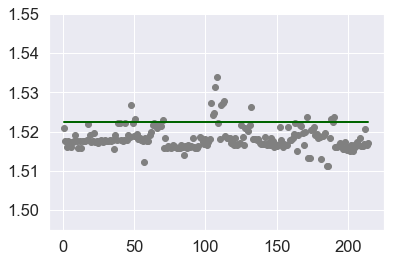

In [92]:
plt.scatter(X[:, 0], y, c='gray')
plt.plot(X[:, 0], stregr.predict(X), c='darkgreen', lw=2)